In [1]:
# Mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

# load data from csv
data_file = pd.read_csv('dataset.csv')
mangga_transform = pd.DataFrame(data_file)
mangga_transform

,contrast,dissimilarity,energy,homogeneity,Maturity_level
0,0.740249,0.574306,0.350432,0.400784,matang
1,0.480392,0.395481,0.358306,0.428219,matang
2,0.602184,0.444114,0.299952,0.363664,matang
3,0.578127,0.475097,0.230023,0.284099,matang
4,0.802020,0.560753,0.340678,0.396246,matang
...,...,...,...,...,...
115,0.373949,0.265267,0.436035,0.551093,sangat_matang
116,0.582741,0.482200,0.336857,0.412595,sangat_matang
117,0.549824,0.434324,0.371035,0.449379,sangat_matang
118,0.599778,0.499945,0.303831,0.369353,sangat_matang


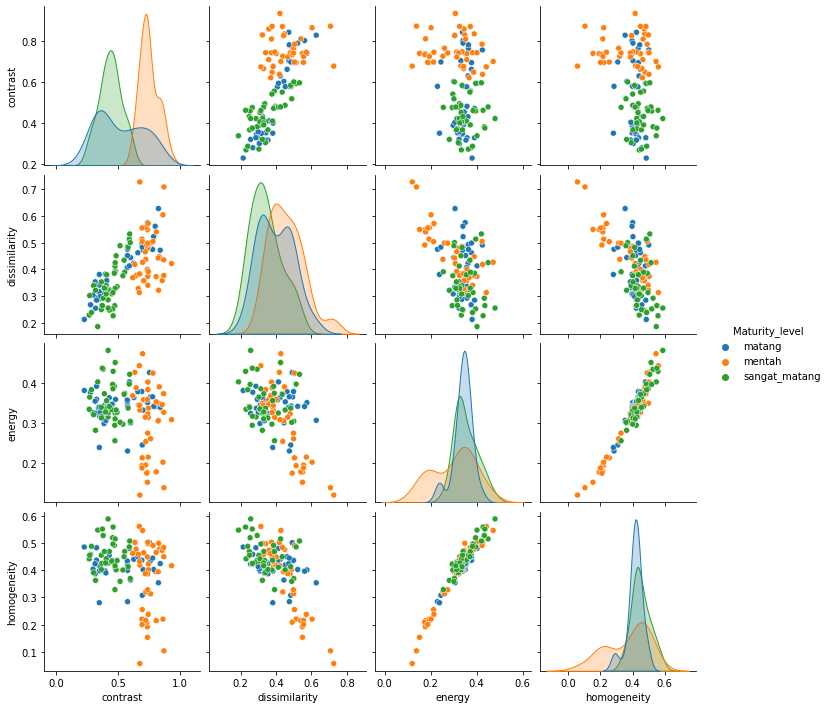

In [3]:
# Melihat persebaran data
import seaborn as sns
sns.pairplot(mangga_transform, hue = 'Maturity_level')

In [4]:
mangga_normal = pd.DataFrame(mangga_transform, columns=mangga_transform.columns[:-1])
mangga_normal


,contrast,dissimilarity,energy,homogeneity
0,0.740249,0.574306,0.350432,0.400784
1,0.480392,0.395481,0.358306,0.428219
2,0.602184,0.444114,0.299952,0.363664
3,0.578127,0.475097,0.230023,0.284099
4,0.802020,0.560753,0.340678,0.396246
...,...,...,...,...
115,0.373949,0.265267,0.436035,0.551093
116,0.582741,0.482200,0.336857,0.412595
117,0.549824,0.434324,0.371035,0.449379
118,0.599778,0.499945,0.303831,0.369353


In [5]:
# Membagi data uji dan data latih
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mangga_normal, mangga_transform['Maturity_level'], test_size = 0.2, random_state=7)
len(X_test)

24

In [6]:
# Melatih model menggunakan KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
model.fit(X_train, y_train)
prediksi = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediksi))

0.6666666666666666


In [7]:
import sklearn

print(sklearn.__version__)

0.22


In [8]:
from sklearn_porter import Porter

# export model
porter = Porter(model, language='java')
output = porter.export(export_data=True)
print(output)

import java.io.File;
import java.io.FileNotFoundException;
import java.util.*;
import com.google.gson.Gson;


class KNeighborsClassifier {

    private class Classifier {
        private int kNeighbors;
        private int nClasses;
        private double power;
        private double[][] X;
        private int[] y;
    }

    private class Sample {
        Integer y;
        Double dist;
        private Sample(int y, double distance) {
            this.y = y;
            this.dist = distance;
        }
    }

    private Classifier clf;
    private int nTemplates;

    public KNeighborsClassifier(String file) throws FileNotFoundException {
        String jsonStr = new Scanner(new File(file)).useDelimiter("\\Z").next();
        this.clf = new Gson().fromJson(jsonStr, Classifier.class);
        this.nTemplates = this.clf.y.length;
    }

    private static double compute(double[] temp, double[] cand, double q) {
        double dist = 0.;
        double diff;
        for (int i = 0, l = 

In [9]:
# Memilih nilai K
accuracy_rate = []

for k in range(1,50):  # maksmimal rangenya 96 (data train)
  model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  yhat = model.predict(X_test)
  accuracy_rate.append(metrics.accuracy_score(y_test, yhat))

In [10]:
print("Akurasi maksimum:",max(accuracy_rate),"pada K =",(accuracy_rate.index(max(accuracy_rate))+1))

Akurasi maksimum: 0.75 pada K = 8


Text(0, 0.5, 'Accuracy Rate')

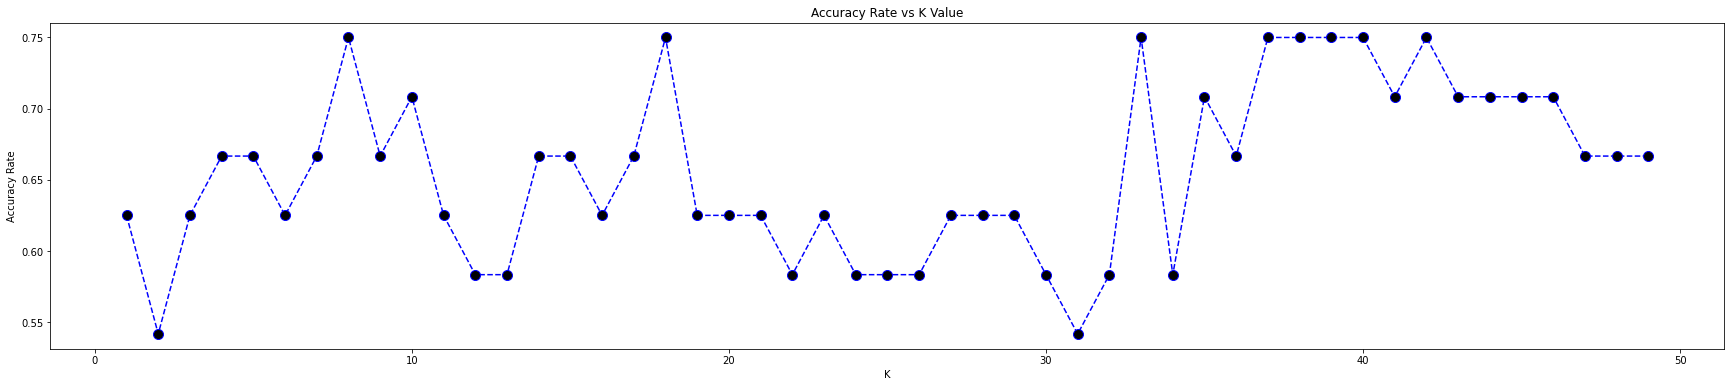

In [11]:
plt.figure(figsize=(30,6))
plt.plot(range(1,50), accuracy_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor='black', markersize=10)
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [12]:
# Memasukkan K yang baru (optimal)
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
prediksi = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediksi))

0.625
